In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [28]:
data=pd.read_csv("Train.csv")
data.head()

ID account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  12554      current      M   35          708     24893.00       378.00   
1  17645      current      M   35          123     18941.62       966.00   
2   7604      current      M   55          802      5678.87      2724.00   
3   1590      current      F   29          867     30489.50      1236.00   
4  16556      current      M   34          802      7441.40      6906.04   

   cc_cons_may  dc_cons_may  cc_cons_jun  ...  debit_count_may  \
0     10288.00     29664.00     16291.40  ...               40   
1     20672.00       287.00      4217.00  ...               78   
2      1964.50      3933.11     23956.25  ...               82   
3     12609.88      9138.14     17521.00  ...               38   
4      4364.00      1939.00      2121.00  ...               50   

   max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
0                24563.0          30051.32            12761.0   
1                23948.0          42119.05            76206.0   
2                10752.0          58373.25            75283.0   
3                12607.0          69851.51            68708.0   
4                25213.0          10071.00            80140.0   

   credit_count_jun  debit_count_jun  max_credit_amount_jun  loan_enq  \
0                 2               65                50836.0         Y   
1                21               63                23226.0         Y   
2                 7                1                27036.0         Y   
3                21               83                43037.0         Y   
4                 8               32                32044.0         Y   

   emi_active  cc_cons  
0     1674.09    20014  
1    13043.34    10173  
2    25375.27    16095  
3     3544.33     7707  
4    12780.44    96408  

[5 rows x 44 columns]

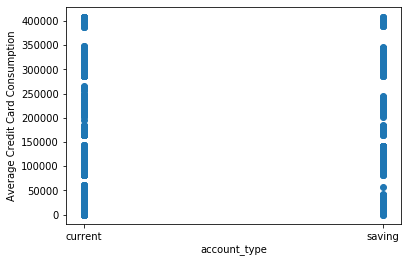

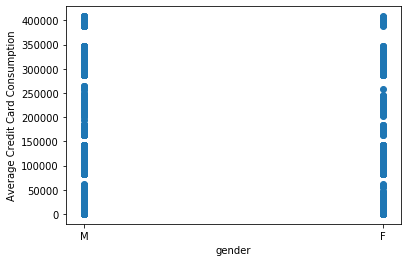

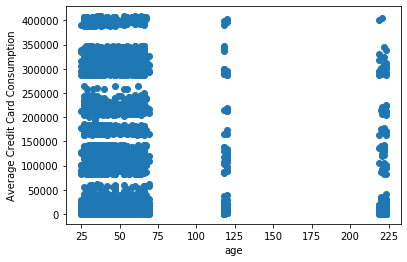

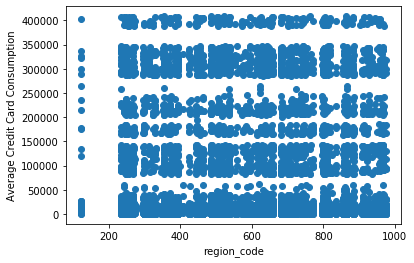

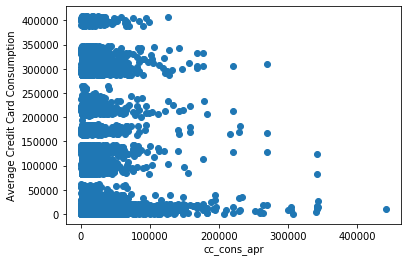

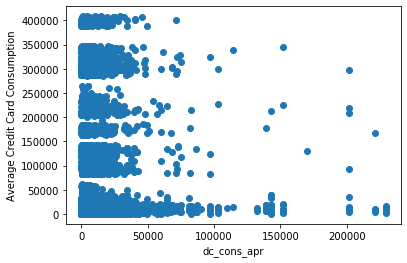

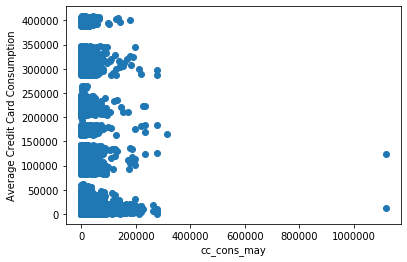

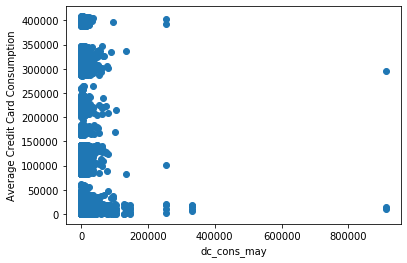

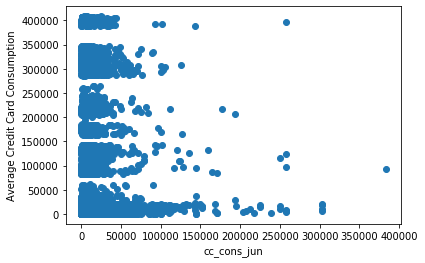

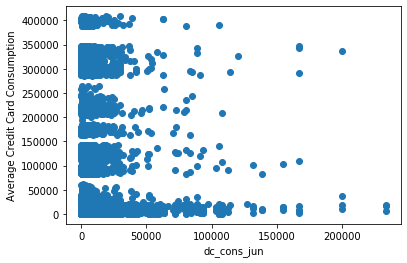

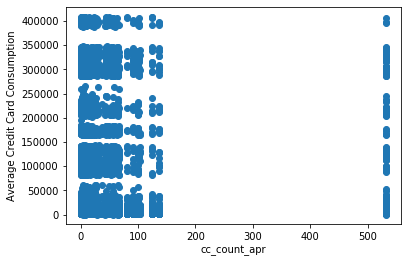

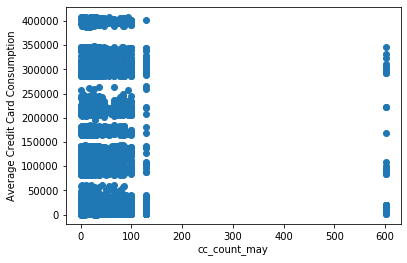

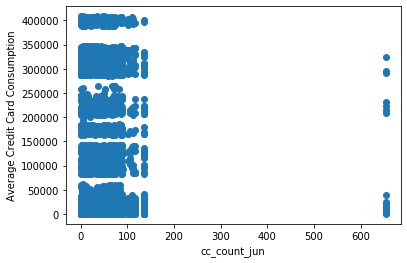

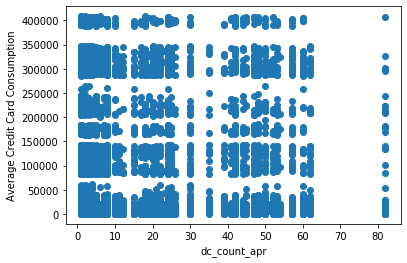

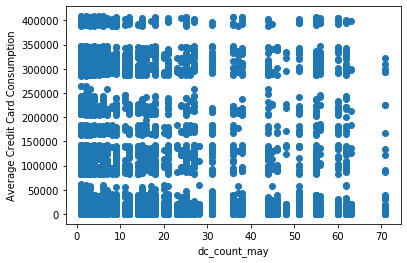

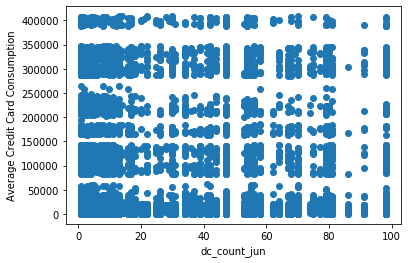

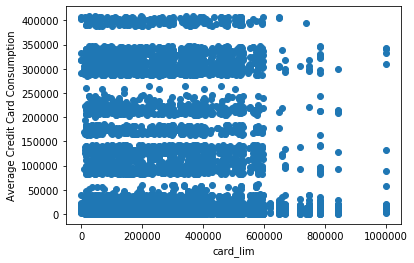

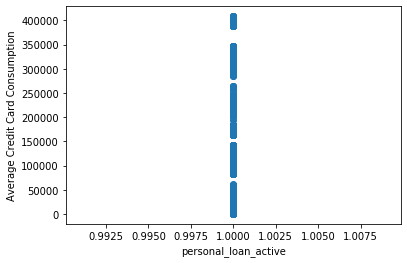

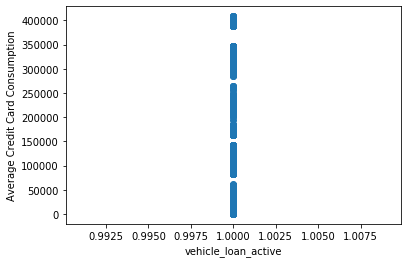

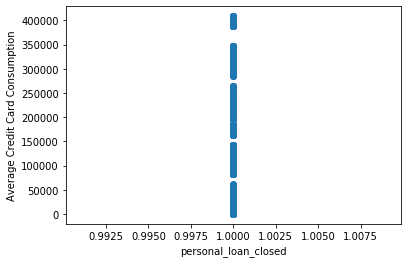

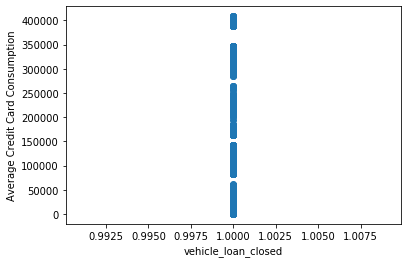

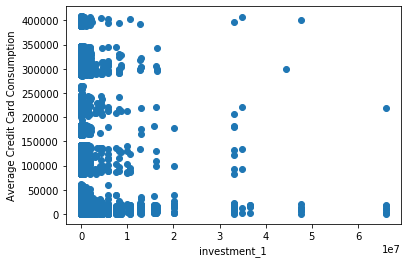

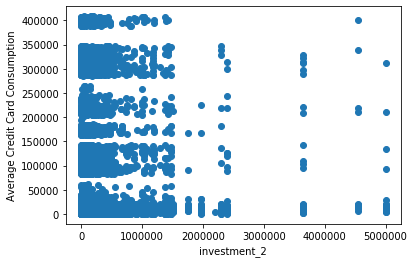

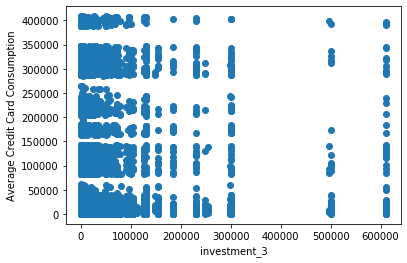

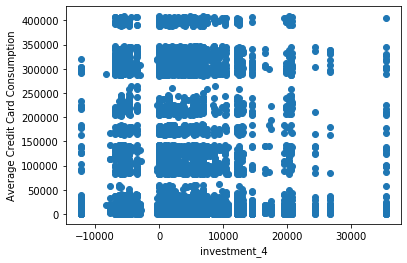

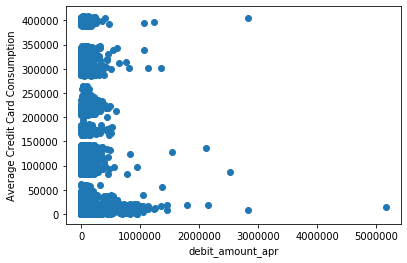

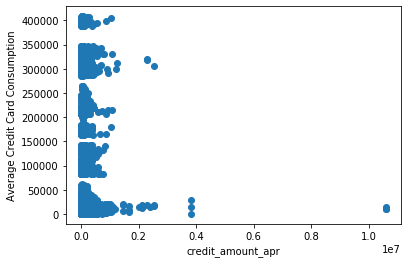

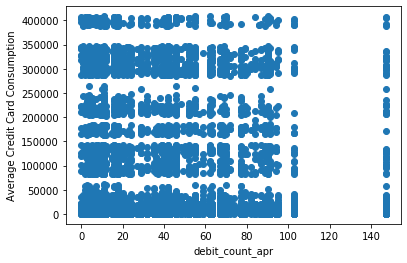

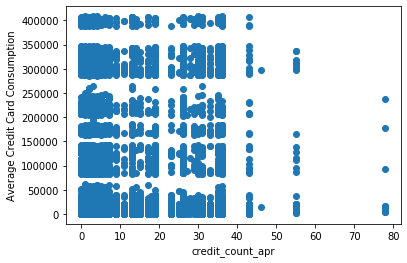

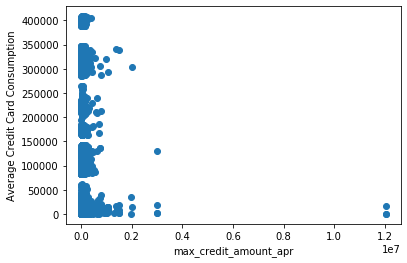

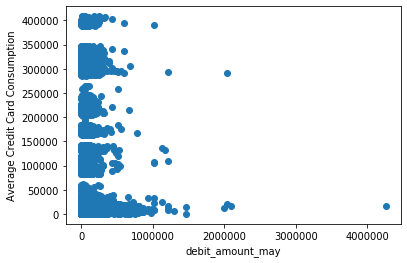

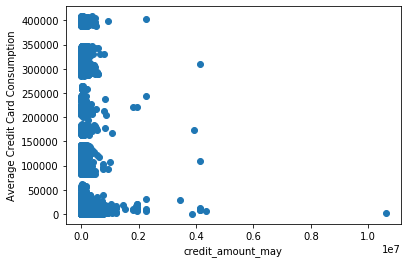

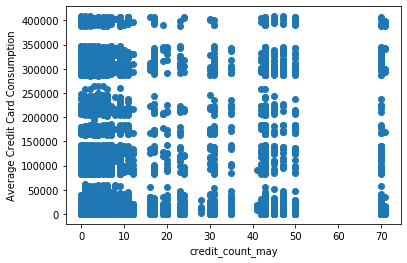

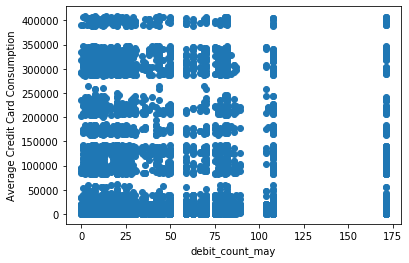

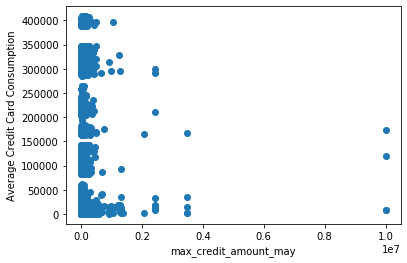

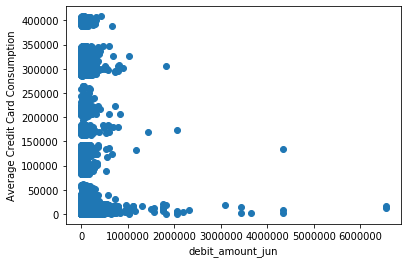

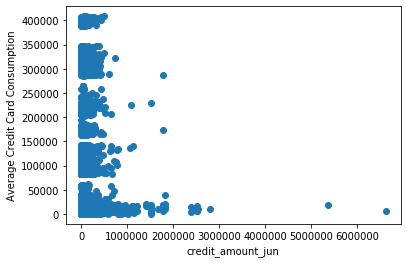

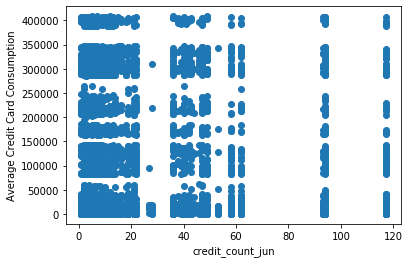

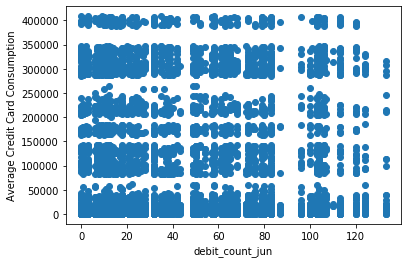

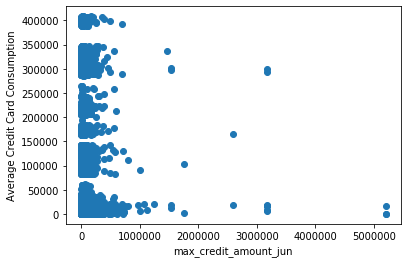

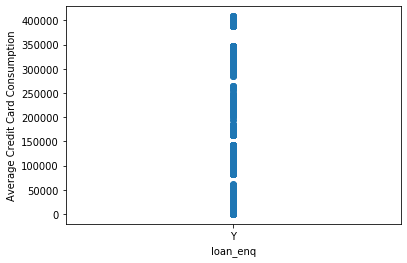

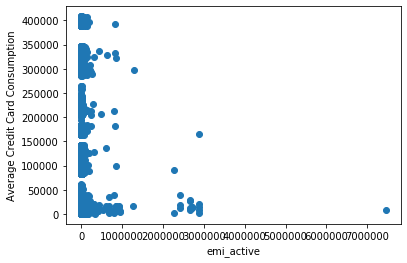

In [4]:
for cols in data.drop(['cc_cons','ID'],1).columns:
    plt.scatter(data[cols], data['cc_cons'])
    plt.xlabel(cols)
    plt.ylabel('Average Credit Card Consumption')
    plt.show()

In [29]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','No.of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'No.of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(data)


Feature No.of Outliers
0                      ID              0
1                     age            534
2             region_code              0
3             cc_cons_apr           1217
4             dc_cons_apr           1220
5             cc_cons_may           1202
6             dc_cons_may           1248
7             cc_cons_jun           1181
8             dc_cons_jun           1366
9            cc_count_apr            883
10           cc_count_may            709
11           cc_count_jun             49
12           dc_count_apr            434
13           dc_count_may           1233
14           dc_count_jun              0
15               card_lim             59
16   personal_loan_active              0
17    vehicle_loan_active              0
18   personal_loan_closed              0
19    vehicle_loan_closed              0
20           investment_1           2123
21           investment_2           1297
22           investment_3           1554
23           investment_4           1004
24       debit_amount_apr           1239
25      credit_amount_apr           1229
26        debit_count_apr            231
27       credit_count_apr             58
28  max_credit_amount_apr           1376
29       debit_amount_may           1235
30      credit_amount_may           1173
31       credit_count_may           2655
32        debit_count_may            617
33  max_credit_amount_may           1300
34       debit_amount_jun           1164
35      credit_amount_jun           1218
36       credit_count_jun           2217
37        debit_count_jun              0
38  max_credit_amount_jun           1385
39             emi_active           1393
40                cc_cons           3134

In [30]:
from scipy.stats.mstats import winsorize

# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.9, 0.18],inclusive=(True, True))
    
    return dataframe    


dataframe = treat_outliers(data)

# Checking for outliers after applying winsorization
detect_outliers(dataframe)

Feature No.of Outliers
0                      ID              0
1                     age              0
2             region_code              0
3             cc_cons_apr              0
4             dc_cons_apr              0
5             cc_cons_may              0
6             dc_cons_may              0
7             cc_cons_jun              0
8             dc_cons_jun              0
9            cc_count_apr              0
10           cc_count_may              0
11           cc_count_jun              0
12           dc_count_apr              0
13           dc_count_may              0
14           dc_count_jun              0
15               card_lim              0
16   personal_loan_active              0
17    vehicle_loan_active              0
18   personal_loan_closed              0
19    vehicle_loan_closed              0
20           investment_1              0
21           investment_2              0
22           investment_3              0
23           investment_4              0
24       debit_amount_apr              0
25      credit_amount_apr              0
26        debit_count_apr              0
27       credit_count_apr              0
28  max_credit_amount_apr              0
29       debit_amount_may              0
30      credit_amount_may              0
31       credit_count_may              0
32        debit_count_may              0
33  max_credit_amount_may              0
34       debit_amount_jun              0
35      credit_amount_jun              0
36       credit_count_jun              0
37        debit_count_jun              0
38  max_credit_amount_jun              0
39             emi_active              0
40                cc_cons              0

In [31]:
data

ID account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0      18029      current      M   64          883     41031.81      18442.0   
1      18029      current      M   64          883     41031.81      18442.0   
2      18029      current      M   64          883     41031.81      18442.0   
3      18029      current      F   64          883     41031.81      18442.0   
4      18029      current      M   64          883     41031.81      18442.0   
...      ...          ...    ...  ...          ...          ...          ...   
14995  18029      current      F   64          883     41031.81      18442.0   
14996  18029      current      M   64          883     41031.81      18442.0   
14997  18029      current      M   64          883     41031.81      18442.0   
14998  18029      current      M   64          883     41031.81      18442.0   
14999  18029      current      M   64          883     41031.81      18442.0   

       cc_cons_may  dc_cons_may  cc_cons_jun  ...  debit_count_may  \
0         36299.36     16077.96     27043.49  ...               84   
1         36299.36     16077.96     27043.49  ...               84   
2         36299.36     16077.96     27043.49  ...               84   
3         36299.36     16077.96     27043.49  ...               84   
4         36299.36     16077.96     27043.49  ...               84   
...            ...          ...          ...  ...              ...   
14995     36299.36     16077.96     27043.49  ...               84   
14996     36299.36     16077.96     27043.49  ...               84   
14997     36299.36     16077.96     27043.49  ...               84   
14998     36299.36     16077.96     27043.49  ...               84   
14999     36299.36     16077.96     27043.49  ...               84   

       max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
0                   102500.0         149576.73           157502.0   
1                   102500.0         149576.73           157502.0   
2                   102500.0         149576.73           157502.0   
3                   102500.0         149576.73           157502.0   
4                   102500.0         149576.73           157502.0   
...                      ...               ...                ...   
14995               102500.0         149576.73           157502.0   
14996               102500.0         149576.73           157502.0   
14997               102500.0         149576.73           157502.0   
14998               102500.0         149576.73           157502.0   
14999               102500.0         149576.73           157502.0   

       credit_count_jun  debit_count_jun  max_credit_amount_jun  loan_enq  \
0                    58              103               100183.0         Y   
1                    58              103               100183.0         Y   
2                    58              103               100183.0         Y   
3                    58              103               100183.0         Y   
4                    58              103               100183.0         Y   
...                 ...              ...                    ...       ...   
14995                58              103               100183.0         Y   
14996                58              103               100183.0         Y   
14997                58              103               100183.0         Y   
14998                58              103               100183.0         Y   
14999                58              103               100183.0         Y   

       emi_active  cc_cons  
0        19829.96   219704  
1        19829.96   219704  
2        19829.96   219704  
3        19829.96   219704  
4        19829.96   219704  
...           ...      ...  
14995    19829.96   219704  
14996    19829.96   219704  
14997    19829.96   219704  
14998    19829.96   219704  
14999    19829.96   219704  

[15000 rows x 44 columns]

In [32]:
le_account_type=LabelEncoder()
data['account_type']=le_account_type.fit_transform(data['account_type'])

le_gender=LabelEncoder()
data['gender']=le_gender.fit_transform(data['gender'])

le_loan_enq=LabelEncoder()
data['loan_enq']=le_loan_enq.fit_transform(data['loan_enq'])

data.head()

ID  account_type  gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  18029             0       1   64          883     41031.81      18442.0   
1  18029             0       1   64          883     41031.81      18442.0   
2  18029             0       1   64          883     41031.81      18442.0   
3  18029             0       0   64          883     41031.81      18442.0   
4  18029             0       1   64          883     41031.81      18442.0   

   cc_cons_may  dc_cons_may  cc_cons_jun  ...  debit_count_may  \
0     36299.36     16077.96     27043.49  ...               84   
1     36299.36     16077.96     27043.49  ...               84   
2     36299.36     16077.96     27043.49  ...               84   
3     36299.36     16077.96     27043.49  ...               84   
4     36299.36     16077.96     27043.49  ...               84   

   max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
0               102500.0         149576.73           157502.0   
1               102500.0         149576.73           157502.0   
2               102500.0         149576.73           157502.0   
3               102500.0         149576.73           157502.0   
4               102500.0         149576.73           157502.0   

   credit_count_jun  debit_count_jun  max_credit_amount_jun  loan_enq  \
0                58              103               100183.0         0   
1                58              103               100183.0         0   
2                58              103               100183.0         0   
3                58              103               100183.0         0   
4                58              103               100183.0         0   

   emi_active  cc_cons  
0    19829.96   219704  
1    19829.96   219704  
2    19829.96   219704  
3    19829.96   219704  
4    19829.96   219704  

[5 rows x 44 columns]

In [35]:
#for col in data.drop('ID',1).columns:
 #   if data[col].skew()>0:
  #      data[col]=np.sqrt(data[col])
   # else :
    #    data[col]=np.square(data[col])

In [36]:
#data.skew()

In [37]:
df2=data.set_index('ID').drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],1)
df2.head()

account_type  gender  age  region_code  cc_cons_apr  dc_cons_apr  \
ID                                                                        
18029             0       1   64          883     41031.81      18442.0   
18029             0       1   64          883     41031.81      18442.0   
18029             0       1   64          883     41031.81      18442.0   
18029             0       0   64          883     41031.81      18442.0   
18029             0       1   64          883     41031.81      18442.0   

       cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  ...  \
ID                                                         ...   
18029     36299.36     16077.96     27043.49      15856.0  ...   
18029     36299.36     16077.96     27043.49      15856.0  ...   
18029     36299.36     16077.96     27043.49      15856.0  ...   
18029     36299.36     16077.96     27043.49      15856.0  ...   
18029     36299.36     16077.96     27043.49      15856.0  ...   

       credit_count_may  debit_count_may  max_credit_amount_may  \
ID                                                                
18029                43               84               102500.0   
18029                43               84               102500.0   
18029                43               84               102500.0   
18029                43               84               102500.0   
18029                43               84               102500.0   

       debit_amount_jun  credit_amount_jun  credit_count_jun  debit_count_jun  \
ID                                                                              
18029         149576.73           157502.0                58              103   
18029         149576.73           157502.0                58              103   
18029         149576.73           157502.0                58              103   
18029         149576.73           157502.0                58              103   
18029         149576.73           157502.0                58              103   

       max_credit_amount_jun  emi_active  cc_cons  
ID                                                 
18029               100183.0    19829.96   219704  
18029               100183.0    19829.96   219704  
18029               100183.0    19829.96   219704  
18029               100183.0    19829.96   219704  
18029               100183.0    19829.96   219704  

[5 rows x 38 columns]

In [38]:
df2.isna().sum()

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
emi_active               0
c

In [39]:
#df2.investment_4=df2.investment_4.fillna(0)

In [40]:
#df2.isna().sum()

In [41]:
X=df2.drop('cc_cons',1)
y=df2['cc_cons']
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.25, random_state=40)

In [42]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred_train=lr.predict(X_train)
y_pred_val=lr.predict(X_val)

In [47]:
train_rmsle=rmsle(y_train, y_pred_train)
val_rmsle=rmsle(y_val, y_pred_val)
print('%0.8f'%train_rmsle, '%0.8f'%val_rmsle)

0.00000000 0.00000000


In [48]:
test=pd.read_csv('Test.csv')
test.head()

ID account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  17591      current      M   37          575      2795.45       1290.0   
1  13541      current      M   33          394     29405.13       1640.0   
2  13431      current      M   53          324      5985.20       6189.0   
3   8687      current      M   33          370      2105.93      18225.0   
4  14727      current      M   62          505      3269.00       3532.0   

   cc_cons_may  dc_cons_may  cc_cons_jun  ...  credit_count_may  \
0      6141.05       676.50      9146.10  ...              24.0   
1      1670.00      2463.92     10947.50  ...              43.0   
2      2696.09       766.00       716.00  ...              42.0   
3     34763.56       167.00      4260.27  ...               3.0   
4      3158.40      2699.77      3373.48  ...              70.0   

   debit_count_may  max_credit_amount_may  debit_amount_jun  \
0             20.0                 9750.0          30527.88   
1             40.0                16967.0          14342.83   
2             35.0                36398.0          32503.16   
3              5.0                97825.0          93572.42   
4             75.0                27936.0          19011.50   

   credit_amount_jun  credit_count_jun  debit_count_jun  \
0           31271.00               3.0             12.0   
1           16582.00               6.0             39.0   
2           33539.54               5.0              9.0   
3          109429.75              21.0              0.0   
4           41401.00               6.0             35.0   

   max_credit_amount_jun  loan_enq  emi_active  
0               25945.92         Y     1170.49  
1               12214.00         Y    16447.45  
2               13215.00         Y     2622.28  
3               72317.00         Y      340.79  
4               42344.00         Y     2812.20  

[5 rows x 43 columns]

In [49]:
test['account_type']=le_account_type.transform(test['account_type'])

test['gender']=le_gender.transform(test['gender'])

test['loan_enq']=le_loan_enq.transform(test['loan_enq'])

#for col in test.drop('ID',1).columns:
  #  if test[col].skew()>0:
   #     test[col]=np.sqrt(test[col])
   # else:
      #  test[col]=np.square(test[col])

X_test=test.set_index('ID').drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],1)

In [50]:
X_test.isna().sum()

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
emi_active               0
d

In [67]:
#for col in X_test.drop(['account_type','gender'],1).columns:
 #   if X_test[col].skew()>0:
  #      X_test[col]=np.sqrt(X_test[col])
   # else:
    #    X_test[col]=np.square(X_test[col])

#X_test['account_type']=le_account_type.transform(X_test['account_type'])

#X_test['gender']=le_gender.transform(X_test['gender'])

In [51]:
#X_test['investment_4']=X_test.fillna(0)

In [52]:
lr.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [70]:
#X_test=X_test.fillna(0)

In [59]:
y_pred=lr.predict(X_test)

X_test['cc_cons']=y_pred
#y_pred

result2=pd.DataFrame(X_test['cc_cons'])

result2.to_csv('submission6.csv',index=True)

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(criterion='mse', bootstrap=False)
rf.fit(X_train, y_train)

C:\Users\AP hatela\Miniconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
pred_rf_train=rf.predict(X_train)
pred_rf_val=rf.predict(X_val)
train_rmsle=rmsle(pred_rf_train, y_train)
val_rmsle=rmsle(pred_rf_val, y_val)
print(train_rmsle, val_rmsle)

0.0 0.0


In [58]:
y_pred=rf.predict(X_test)

y_pred

array([219704., 219704., 219704., ..., 219704., 219704., 219704.])